In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,region_area_1,3.716080,180.196811,18630.36267,6.330435,NaN,602.990359,15.285013,56.444076,4.500656,0
1,region_area_100,4.270716,217.611599,24405.55535,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,region_area_1000,6.648849,232.462013,30733.80865,5.656462,344.670336,267.809179,17.863444,35.411181,4.827527,0
3,region_area_1001,NaN,261.753638,21174.71329,7.314074,NaN,582.848407,15.215849,90.367455,4.217553,0
4,region_area_1002,9.323584,263.484560,15751.48011,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0


In [4]:
df.fillna(df.mean(), inplace=True)

In [5]:
df.head()

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,region_area_1,3.716080,180.196811,18630.36267,6.330435,334.442497,602.990359,15.285013,56.444076,4.500656,0
1,region_area_100,4.270716,217.611599,24405.55535,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,region_area_1000,6.648849,232.462013,30733.80865,5.656462,344.670336,267.809179,17.863444,35.411181,4.827527,0
3,region_area_1001,7.079240,261.753638,21174.71329,7.314074,334.442497,582.848407,15.215849,90.367455,4.217553,0
4,region_area_1002,9.323584,263.484560,15751.48011,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0


In [6]:
df_1 = df.drop('Potability',axis=1) # Define a dataframe with only features
df_feat = df_1.drop('region_area_',axis=1) # Define a dataframe with only features
df_feat.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,3.716080,180.196811,18630.36267,6.330435,334.442497,602.990359,15.285013,56.444076,4.500656
1,4.270716,217.611599,24405.55535,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906
2,6.648849,232.462013,30733.80865,5.656462,344.670336,267.809179,17.863444,35.411181,4.827527
3,7.079240,261.753638,21174.71329,7.314074,334.442497,582.848407,15.215849,90.367455,4.217553
4,9.323584,263.484560,15751.48011,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650


In [7]:
df_target = df['Potability'] # Define a dataframe with only target results i.e. cancer detections
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=101)

In [9]:
y_train.head()

2006    1
2365    0
1295    0
2157    1
1907    1
Name: Potability, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
scaler.fit(df_1.drop('region_area_',axis=1))
scaled_features = scaler.transform(df_1.drop('region_area_',axis=1))

In [19]:
df_feat = pd.DataFrame(scaled_features,columns=df_1.columns[1:])
df_feat.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-2.277080e+00,-1.967644,-0.392427,-0.316906,1.810328e-14,2.064913,0.276427,-0.628784,0.680256
1,-1.901555e+00,-0.869532,0.256256,0.149191,-9.684502e-01,-0.959075,-0.239088,-0.745414,-0.272178
2,-2.914026e-01,-0.433678,0.967060,-0.732287,2.714436e-01,-2.099934,1.057638,-1.951741,1.102819
3,-7.817618e-15,0.426022,-0.106640,0.289326,1.810328e-14,1.814636,0.255471,1.504978,0.314275
4,1.519569e+00,0.476824,-0.715790,-1.015917,-9.779574e-01,-0.334626,-1.104476,0.517572,-1.251119


In [20]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Potability'],
                                                    test_size=0.50, random_state=101)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
pred = knn.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[435 272]
 [203 473]]


In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       707
           1       0.63      0.70      0.67       676

    accuracy                           0.66      1383
   macro avg       0.66      0.66      0.66      1383
weighted avg       0.66      0.66      0.66      1383



In [37]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.343


In [38]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

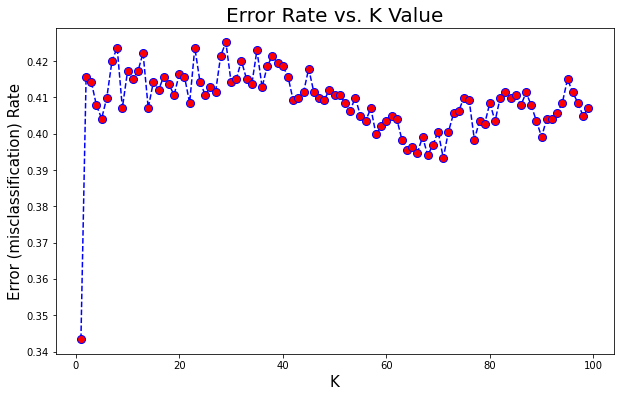

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

In [41]:
test = pd.read_csv('test.csv')

In [48]:
test.fillna(df.mean(), inplace=True)
scaled_test = scaler.transform(test.drop('region_area_',axis=1))

In [49]:
test_pred = knn.predict(scaled_test)

In [50]:
ex = test['region_area_']
dat = pd.DataFrame(ex)
dat['Portability'] = test_pred

In [51]:
dat.head()

,region_area_,Portability
0,region_area_0,1
1,region_area_10,1
2,region_area_1006,0
3,region_area_1010,0
4,region_area_1011,1


In [52]:
dat.to_csv('second.csv')

In [53]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nbc = GaussianNB()

In [57]:
nbc.fit(X_train,y_train)

GaussianNB()

In [58]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 1383 test samples is 607


In [59]:
from sklearn.metrics import classification_report

In [61]:
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.67      0.56      0.61       842
           1       0.45      0.56      0.50       541

    accuracy                           0.56      1383
   macro avg       0.56      0.56      0.55      1383
weighted avg       0.58      0.56      0.57      1383



In [62]:

conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[435 272]
 [203 473]]


In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [65]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
predictions = dtree.predict(X_test)

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       707
           1       0.64      0.70      0.67       676

    accuracy                           0.66      1383
   macro avg       0.66      0.66      0.66      1383
weighted avg       0.66      0.66      0.66      1383



In [68]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[440 267]
 [204 472]]
Accuracy of prediction: 0.659


In [69]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rfc = RandomForestClassifier(n_estimators=6)

In [192]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6)

In [193]:
rfc_pred = rfc.predict(X_test)

In [194]:
cr = classification_report(y_test,predictions)

In [195]:
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       707
           1       0.64      0.70      0.67       676

    accuracy                           0.66      1383
   macro avg       0.66      0.66      0.66      1383
weighted avg       0.66      0.66      0.66      1383



In [196]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)

[[515 192]
 [259 417]]


In [124]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

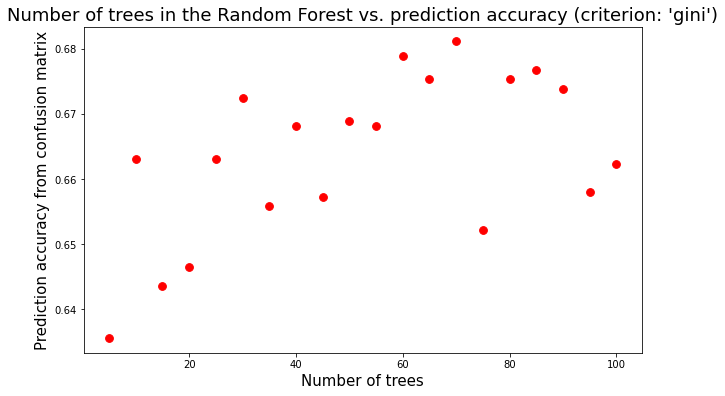

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [78]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

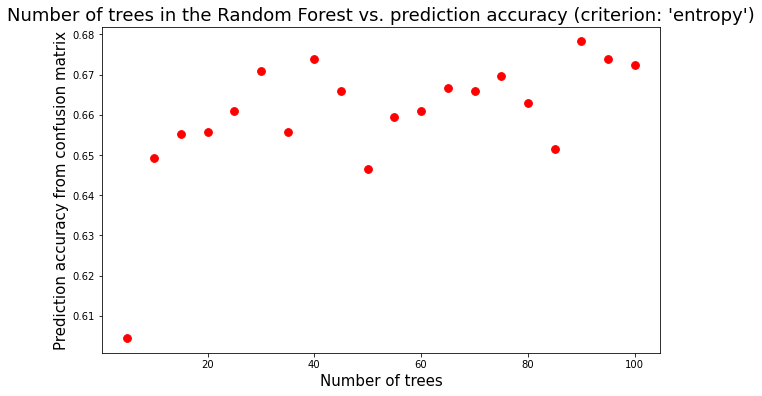

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [80]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

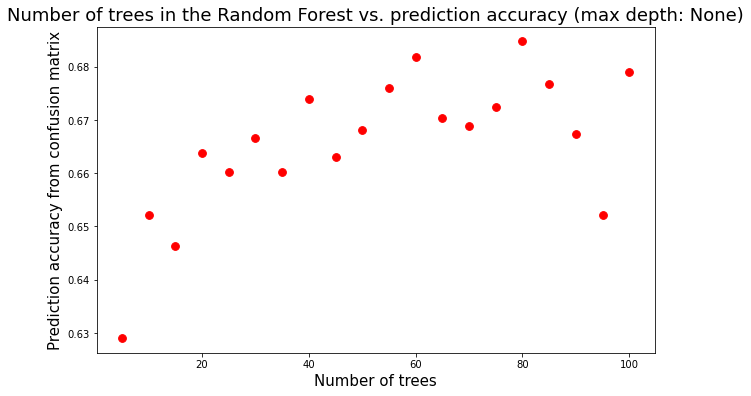

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [82]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=5,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

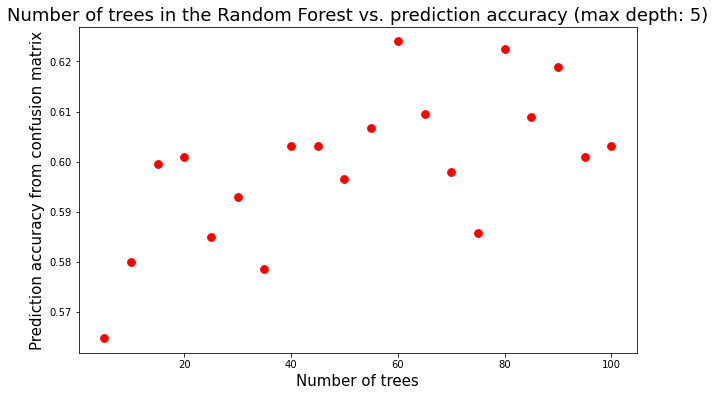

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: 5)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [84]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

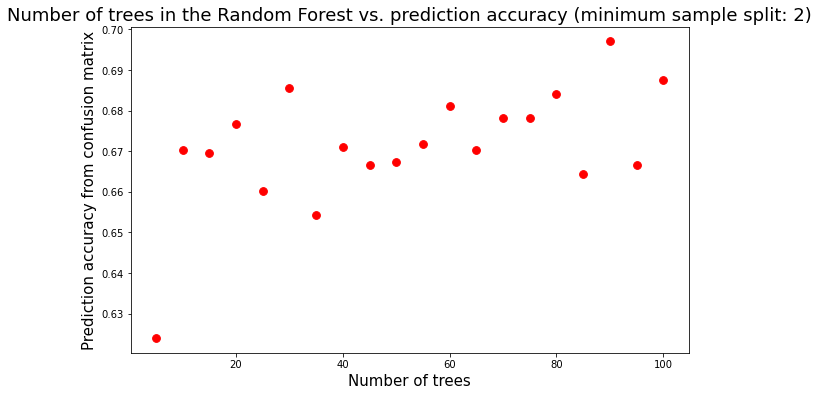

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [86]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=20,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

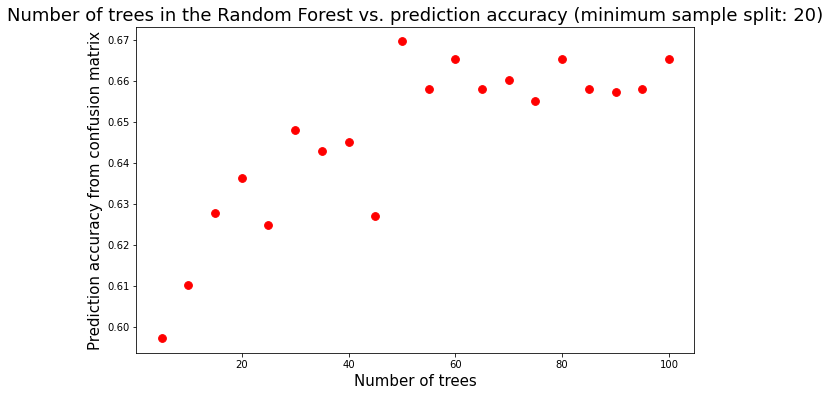

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 20)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [200]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.predict(X_test)

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [212]:
print(classification_report(y_test,nb.predict(X_test)))
cm=confusion_matrix(y_test,nb.predict(X_test))
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61       707
           1       0.56      0.45      0.50       676

    accuracy                           0.56      1383
   macro avg       0.56      0.56      0.55      1383
weighted avg       0.56      0.56      0.56      1383

[[471 236]
 [371 305]]
Accuracy of prediction: 0.561


In [203]:
rfc_pred = rfc.predict(test.drop('region_area_',axis=1))
rex = test['region_area_']
rdat = pd.DataFrame(rex)
rdat['Portability'] = rfc_pred

In [204]:
rdat.to_csv('r_dat.csv')

In [207]:
rfc_pred = rfc.predict_proba(test.drop('region_area_',axis=1))

In [211]:
rfc_pred

array([[0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       ...,
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667]])